In [2]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [3]:
!cd yolov5 && pip3 install -r requirements.txt


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [25]:
import torch
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import cv2

In [2]:
# load pretrained ultralytics model, yolov5s
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /Users/LukeHeitman/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-1-17 Python-3.11.7 torch-2.1.2 CPU

Fusing layers... 
[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [3]:
# architecture of yolov5s
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

Now, see if the model works to detect using the image given on the ultralytics site

In [4]:
zidane_img = cv2.imread('data/original/zidane.jpg')
zidane_img = cv2.cvtColor(zidane_img, cv2.COLOR_BGR2RGB)

In [6]:
results = model(zidane_img)
results.print()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 10.0ms pre-process, 422.9ms inference, 16.3ms NMS per image at shape (1, 3, 384, 640)


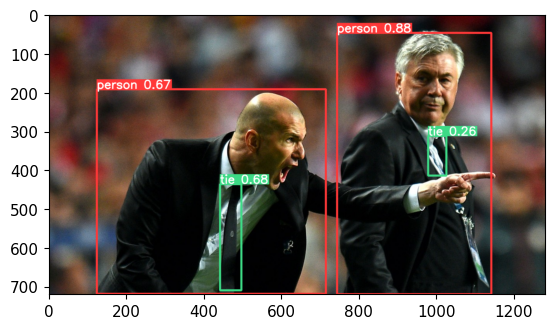

In [7]:
# Show rendered model results
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [9]:
# try on highway traffic
traffic_img = cv2.imread('data/original/highway_traffic.jpg')
traffic_img = cv2.cvtColor(traffic_img, cv2.COLOR_BGR2RGB)

In [10]:
results = model(traffic_img)
results.print()

image 1/1: 1800x1800 11 cars, 5 trucks, 1 cow
Speed: 5.7ms pre-process, 546.9ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


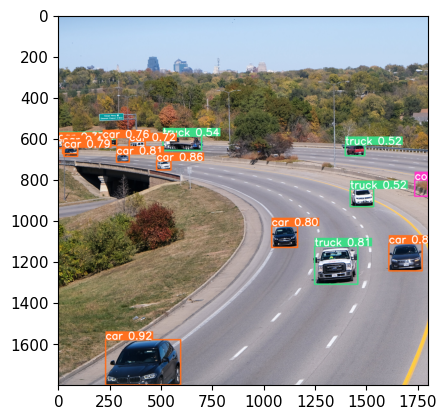

In [11]:
# Show rendered model results
# not perfect, detected a cow on right edge
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [13]:
# copied from chat gpt with minor updates
# allows the ability to have real time detection via web cam or you can pass through video files by replacing cv2.VideoCapture(0) with v2.VideoCapture('file_name.mp4')
# cap = cv2.VideoCapture('data/original/traffic_video.mp4')
cap = cv2.VideoCapture(0)

while cap.isOpened():
  ret, frame = cap.read()
  # pass through frame and make detections
  results = model(frame)
  # update to show results
  cv2.imshow('YOLO', np.squeeze(results.render()))
  if cv2.waitKey(10) & 0xFF == ord('q'):
    break

cap.release()
cv2.destroyAllWindows()

Now attempting to fine tune
Initial idea is to fine tune model so that it is very good at detecting if I'm on my phone
If I am, then it will play a really annoying alarm until it sees I'm off


In [3]:
import uuid 
import os 
import time

In [4]:
images_path = os.path.join('data', 'custom_data')
# distracted in this case just means on phone
labels = ['focused','distracted']
num_images = 20

In [5]:
# captures custom data, a lot of code from above
cap = cv2.VideoCapture(0)
for label in labels:
    print('collecting images for label: ',label)
    # add lag between image capture
    time.sleep(3)
    for num in range(num_images):
        print('img number: ', num)
        ret, frame = cap.read()
        # now save images to data/custom_data folder, uuid just adds unique str
        imgname = os.path.join(images_path, label+'.'+str(uuid.uuid1())+'.jpg')

        cv2.imwrite(imgname, frame)
        cv2.imshow('img collection', frame)
        time.sleep(2)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

collecting images for label:  focused
img number:  0
img number:  1
img number:  2
img number:  3
img number:  4
img number:  5
img number:  6
img number:  7
img number:  8
img number:  9
img number:  10
img number:  11
img number:  12
img number:  13
img number:  14
img number:  15
img number:  16
img number:  17
img number:  18
img number:  19
collecting images for label:  distracted
img number:  0
img number:  1
img number:  2
img number:  3
img number:  4
img number:  5
img number:  6
img number:  7
img number:  8
img number:  9
img number:  10
img number:  11
img number:  12
img number:  13
img number:  14
img number:  15
img number:  16
img number:  17
img number:  18
img number:  19


In [1]:
# now that the images are captured, need to label images
# using https://github.com/tzutalin/labelImg

! git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...
remote: Enumerating objects: 2097, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 2097 (delta 0), reused 4 (delta 0), pack-reused 2090
Receiving objects: 100% (2097/2097), 237.14 MiB | 35.98 MiB/s, done.
Resolving deltas: 100% (1245/1245), done.


In [5]:
# found in the labelImg git, need to install dependencies
!pip3 install pyqt5 lxml


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [15]:
!cd labelImg && make qt5py3 && python3 labelImg.py

pyrcc5 -o libs/resources.py resources.qrc
Image:/Users/LukeHeitman/Desktop/getGood/YOLO_object_detection/data/custom_data/distracted.04ca4536-b50b-11ee-b29e-b6c11bf9e1d7.jpg -> Annotation:/Users/LukeHeitman/Desktop/getGood/YOLO_object_detection/data/custom_labels/distracted.04ca4536-b50b-11ee-b29e-b6c11bf9e1d7.txt
Image:/Users/LukeHeitman/Desktop/getGood/YOLO_object_detection/data/custom_data/distracted.09b6f134-b50b-11ee-b29e-b6c11bf9e1d7.jpg -> Annotation:/Users/LukeHeitman/Desktop/getGood/YOLO_object_detection/data/custom_labels/distracted.09b6f134-b50b-11ee-b29e-b6c11bf9e1d7.txt
Image:/Users/LukeHeitman/Desktop/getGood/YOLO_object_detection/data/custom_data/distracted.038e8f9c-b50b-11ee-b29e-b6c11bf9e1d7.jpg -> Annotation:/Users/LukeHeitman/Desktop/getGood/YOLO_object_detection/data/custom_labels/distracted.038e8f9c-b50b-11ee-b29e-b6c11bf9e1d7.txt
Image:/Users/LukeHeitman/Desktop/getGood/YOLO_object_detection/data/custom_data/distracted.087b9fb8-b50b-11ee-b29e-b6c11bf9e1d7.jpg -> A

In [23]:
# annotated images, 20 focused, 17 distracted 
# train model! from yolo git
!cd yolov5 && python3 train.py --img 320 --batch 16 --epochs 5 --data dataset.yml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=5, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-277-g703d37e Python-3.11.7 torch-2.1.2 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, ancho

Load trained model in, this is just for proof of concept, didn't really train sufficiently

In [27]:
model = torch.hub.load('ultralytics/yolov5', 'custom',path = 'yolov5/runs/train/exp6/weights/last.pt', force_reload = True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/LukeHeitman/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-1-17 Python-3.11.7 torch-2.1.2 CPU

Fusing layers... 
[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [28]:
cap = cv2.VideoCapture(0)

while cap.isOpened():
  ret, frame = cap.read()
  # pass through frame and make detections
  results = model(frame)
  # update to show results
  cv2.imshow('YOLO', np.squeeze(results.render()))
  if cv2.waitKey(10) & 0xFF == ord('q'):
    break

cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 